# 21DS602 MACHINE LEARNING

#### SUBMITTED BY,

### MEGHA R - CB.SC.P2DSC23010

### KADWE TANUJA PRAVIN - CB.SC.P2DSC23011

                                                                                       

# A CHATBOT FOR DISEASE PREDICTION

In [121]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,_tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import csv
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [122]:
training = pd.read_csv('Data/Training.csv')
#testing = pd.read_csv('Data/Testing.csv')

cols= training.columns       # retrieves column names from the training data frame
cols= cols[:-1]              # excludes the last column
x = training[cols]
y = training['prognosis']
y1= y

In [123]:
reduced_data = training.groupby(training['prognosis']).max() # keeps only the rows with the maximum values for each  
                                                             # feature within each 'prognosis' group to focus on the most severe 
                                                             # cases associated with each medical prognosis. 
#print(reduced_data)

In [124]:
# converts categorical labels into numerical format
le = preprocessing.LabelEncoder()
le.fit(y)                          # builds a mapping between original categorical labels and integer values.
y = le.transform(y)

In [125]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print("X Train Shape:", x_train.shape)
print("X Test Shape:", x_test.shape)
print("Y Train Shape:", y_train.shape)
print("Y Test Shape:", y_test.shape)

#print(x_train)
#testx  = testing[cols]
#testy  = testing['prognosis'] 
#le.fit(testy)
#testy  = le.transform(testy)

X Train Shape: (3936, 132)
X Test Shape: (984, 132)
Y Train Shape: (3936,)
Y Test Shape: (984,)


In [126]:
clf1  = DecisionTreeClassifier()
clf = clf1.fit(x_train,y_train)

print ("cross validation result========")
scores = cross_val_score(clf,x_train,y_train, cv=5)
print (scores)
print (scores.mean())

y_pred_tree = clf.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average = 'weighted')
recall_tree = recall_score(y_test, y_pred_tree, average = 'weighted')
f1_tree = f1_score(y_test, y_pred_tree, average = 'weighted')
    
print(f"Accuracy: {accuracy_tree:.2f}")
print(f"Precision: {precision_tree:.2f}")
print(f"Recall: {recall_tree:.2f}")
print(f"F1-score: {f1_tree:.2f}")

cross validation result========
[1.         1.         1.         0.99872935 0.99872935]
0.9994917407878017
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [127]:
importances = clf.feature_importances_    # returns an array containing the importance of each features(value btw 0 and 1)
indices = np.argsort(importances)[::-1]   # sorts feature indices in descending order
features = cols

The following graph shows the importance of each feature in our model. Here, each bar represents the importance of a feature and x-axis is labelled with the corresponding feature names.

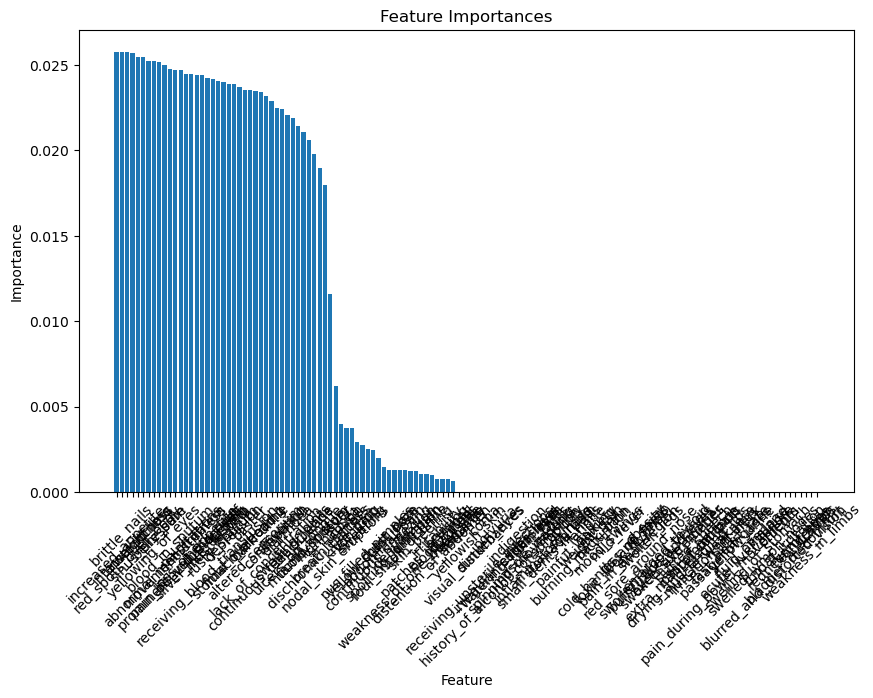

In [128]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices], align="center")
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


In [129]:
severityDictionary=dict()
description_list = dict()
precautionDictionary=dict()
symptoms_dict = {}

In [130]:
for index, symptom in enumerate(x):
       symptoms_dict[symptom] = index
        
def calc_condition(exp,days):
    sum=0
    for item in exp:
         sum=sum+severityDictionary[item]
    if((sum*days)/(len(exp)+1)>13):
        print("You should take the consultation from doctor. ")
    else:
        print("It might not be that bad but you should take precautions.")

In [131]:
def getDescription():
    global description_list
    with open('MasterData/symptom_Description.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _description={row[0]:row[1]}
            description_list.update(_description)

In [132]:
def getSeverityDict():
    global severityDictionary
    with open('MasterData/symptom_severity.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        try:
            for row in csv_reader:
                _diction={row[0]:int(row[1])}
                severityDictionary.update(_diction)
        except:
            pass

In [133]:
def getprecautionDict():
    global precautionDictionary
    with open('MasterData/symptom_precaution.csv') as csv_file:

        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            _prec={row[0]:[row[1],row[2],row[3],row[4]]}
            precautionDictionary.update(_prec)



In [134]:
def getInfo():
    print("-----------------------------------HealthCare ChatBot-----------------------------------")
    print("\nYour Name? \t\t\t\t",end="->")
    name=input("")
    print("Hello, ",name)

In [135]:
def check_pattern(dis_list,inp):
    pred_list=[]
    inp=inp.replace(' ','_')
    patt = f"{inp}"
    regexp = re.compile(patt)
    pred_list=[item for item in dis_list if regexp.search(item)]
    if(len(pred_list)>0):
        return 1,pred_list
    else:
        return 0,[]

In [136]:
def sec_predict(symptoms_exp):
    df = pd.read_csv('Data/Training.csv')
    X = df.iloc[:, :-1]
    y = df['prognosis']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
    rf_clf = DecisionTreeClassifier()
    rf_clf.fit(X_train, y_train)
    
    symptoms_dict = {symptom: index for index, symptom in enumerate(X)}
    input_vector = np.zeros(len(symptoms_dict))
    for item in symptoms_exp:
        input_vector[[symptoms_dict[item]]] = 1

    return rf_clf.predict([input_vector])


In [137]:
def print_disease(node):
    node = node[0]
    val  = node.nonzero() 
    disease = le.inverse_transform(val[0])
    return list(map(lambda x:x.strip(),list(disease)))

In [138]:
def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    chk_dis=",".join(feature_names).split(",")
    
    symptoms_present = []

    while True:

        print("\nEnter the symptom you are experiencing  \t\t",end="->")
        disease_input = input("")
        conf,cnf_dis=check_pattern(chk_dis,disease_input)
        if conf==1:
            print("searches related to input: ")
            for num,it in enumerate(cnf_dis):
                print(num,")",it)
            if num!=0:
                print(f"Select the one you meant (0 - {num}):  ", end="")
                conf_inp = int(input(""))
            else:
                conf_inp=0

            disease_input=cnf_dis[conf_inp]
            break
        else:
            print("Enter valid symptom.")

    while True:
        try:
            num_days=int(input("Okay. From how many days ? : "))
            break
        except:
            print("Enter valid input.")
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]

            if name == disease_input:
                val = 1
            else:
                val = 0
                
            if  val <= threshold:
                recurse(tree_.children_left[node], depth + 1)
            else:
                symptoms_present.append(name)
                recurse(tree_.children_right[node], depth + 1)
        else:
            present_disease = print_disease(tree_.value[node])
            red_cols = reduced_data.columns 
            symptoms_given = red_cols[reduced_data.loc[present_disease].values[0].nonzero()]
            print("Are you experiencing any ")
            
            symptoms_exp=[]               # stores the user's confirmed symptoms
            
            for syms in list(symptoms_given):
                inp=""
                print(syms,"? : ",end='')
                while True:
                    inp=input("")
                    if(inp=="yes" or inp=="no"):
                        break
                    else:
                        print("provide proper answers i.e. (yes/no) : ",end="")
                if(inp=="yes"):
                    symptoms_exp.append(syms)

            second_prediction=sec_predict(symptoms_exp)
            calc_condition(symptoms_exp,num_days)
            if(present_disease[0]==second_prediction[0]):
                print("You may have ", present_disease[0])
                print(description_list[present_disease[0]])

            else:
                print("You may have ", present_disease[0], "or ", second_prediction[0])
                print(description_list[present_disease[0]])
                print(description_list[second_prediction[0]])

            precaution_list=precautionDictionary[present_disease[0]]
            print("Take following measures : ")
            for  i,j in enumerate(precaution_list):
                print(i+1,")",j)

    recurse(0, 1)

In [141]:
getSeverityDict()
getDescription()
getprecautionDict()
getInfo()
tree_to_code(clf,cols)
print("----------------------------------------------------------------------------------------")


-----------------------------------HealthCare ChatBot-----------------------------------

Your Name? 				->tanu
Hello,  tanu

Enter the symptom you are experiencing  		->stiff neck
searches related to input: 
0 ) stiff_neck
Okay. From how many days ? : 4
Are you experiencing any 
muscle_weakness ? : yes
stiff_neck ? : yes
swelling_joints ? : yess
provide proper answers i.e. (yes/no) : yes
movement_stiffness ? : yes
painful_walking ? : yes
It might not be that bad but you should take precautions.
You may have  Arthritis
Arthritis is the swelling and tenderness of one or more of your joints. The main symptoms of arthritis are joint pain and stiffness, which typically worsen with age. The most common types of arthritis are osteoarthritis and rheumatoid arthritis.
Take following measures : 
1 ) exercise
2 ) use hot and cold therapy
3 ) try acupuncture
4 ) massage
----------------------------------------------------------------------------------------


C:\Users\megha\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


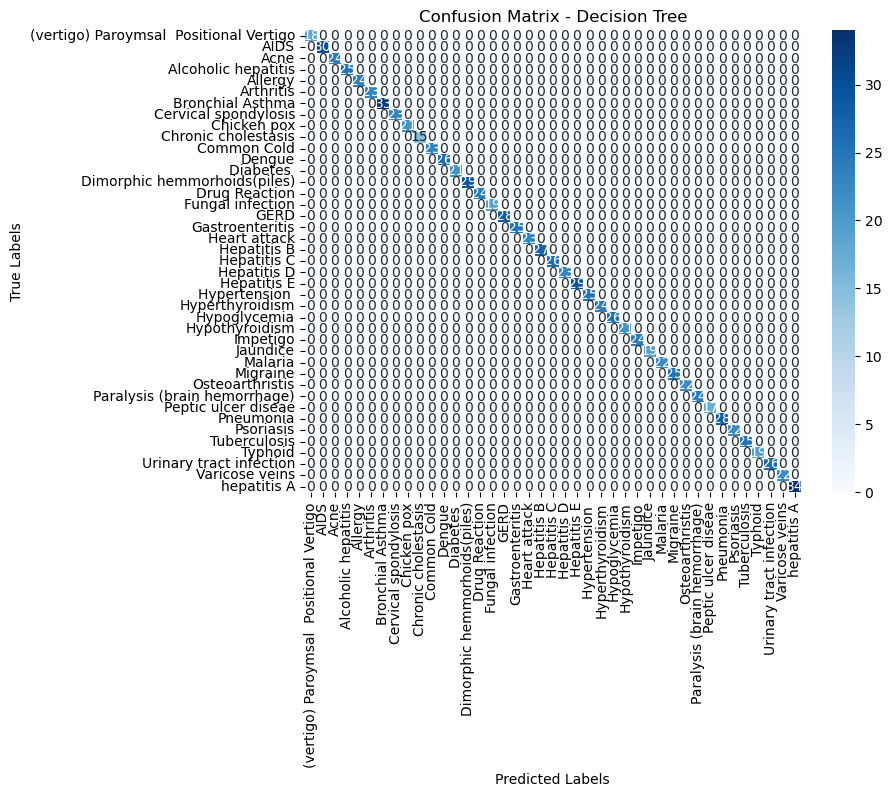

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm_decision_tree = confusion_matrix(y_test, y_pred_tree)
#print(cm_decision_tree )

plt.figure(figsize=(8, 6))
sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix - Decision Tree")
plt.show()




A confusion matrix is plotted.